### Problem Statement:

Make me a nice library of routines for fitting input distributions.
The input to a fitting routine for a particular distribution should be a bunch of
observations; the output should be the maximum likelihood estimate. You can use
your favorite high-level language like C++, Java, Python, Matlab, or even Excel.
Include in your library maximum likelihood estimation routines for fitting all of
the usual discrete and continuous distributions, e.g., Bern(p), Geom(p), Exp(λ),
Normal(μ, σ2), Gamma(α, β), Weibull(α, β), etc., etc. Beware! The Weibull takes
a little work (so does the gamma, for that matter). Luckily, everything is outlined
very clearly in my notes and/or Law (2015). Include in your write-up an easy user’s
guide, complete source code, and some appropriate examples. The examples should
be along the following illustrative lines: Generate some example data; attempt to
fit the data to various distributions; conduct χ2 goodness-of-fit tests to show how
well the fits do. For instance, if you generate some example Weibull data, a Weibull
fit ought to do better than an exponential fit

In [9]:
import numpy as np
from scipy.stats import chisquare
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

### Data Generation Function:

Function below generates data for different distribution types including 'normal', 'geometric', 'gamma', 'binomial', 'exponential', and 'weibull'. parameters for this function are as below: <br>
    - dist_type: which is a string format indicating the distribution type we are looking for <br>
    - par: is the required parameters for each distribution type <br>
    - row_count: is the size of the data <br>  
More distribution types can be added to the function later. <br>


In [32]:
# Define a function to generate different data types

row_count=10000

def data_generation(dist_type, par, row_count):
    if dist_type== 'normal':
        mean, std = par
        data=np.random.normal(mean, std, row_count)
    
    elif dist_type== 'geometric':
        p= par
        data=np.random.geometric(p, row_count)  
       
    elif dist_type== 'binomial':
        n, p= par
        data=np.random.binomial(n, p, row_count)
    
    elif dist_type == 'poisson':
        l= params
        data = np.random.poisson(l, row_count)    
    
    elif dist_type== 'exponential':
        scale= par
        data=np.random.exponential(scale, row_count)
   
    elif dist_type == 'gamma':
        shape , scale = par
        data=np.random.gamma(shape, scale, row_count)
    
    elif dist_type == 'weibull':
        a= par
        data=np.random.weibull(a, row_count) 
    
    elif dist_type == 'uniform':
        a,b = par
        data = np.random.uniform(a, b, row_count)
    
    else:
        raise ValueError("Change distribution type or modify parameters")
        
    return data

In [3]:
def chi_square_test(observed, expected):
    chi_square_statistic = np.sum((observed - expected) ** 2 / expected)
    df = len(observed) - 1
    p_value = 1 - stats.chi2.cdf(chi_square_statistic, df)
    return chi_square_statistic, p_value

In [6]:
# I start with a normal distribution data:
row_count=10000
data=data_generation('normal', [0,1], row_count)
data

array([ 0.04952592, -0.59152811, -0.85714356, ..., -0.76277527,
        2.60043321,  0.92747126])

## Fitting Different Types of Distributions on Generated Data

In the function below, I intend to fit various types of distributions to the generated data and then perform goodness-of-fit tests for each distribution type. Additionally, I created a dictionary that stores the parameters of each fit along with their respective chi-squared statistics. The next step will involve comparing these fits to identify the best-fitting distribution by assessing their respective chi-squared statistic values. As of now, I have initiated this process with normal and exponential fits, and I plan to expand this to include more distribution types later.


In [70]:
# #fit the data to various distributions
# def fit_data_to_distributions(data):
#     fitted_distributions = {}

#     #fit data to the Normal distribution
#     norm_params = stats.norm.fit(data)
#     #print(norm_params)
#     fitted_distributions['normal'] = norm_params
#     actual=np.histogram(data, bins=100)[0]
#     #print(actual)
#     x=np.linspace(data.min(), data.max(), 100)
#     expected_data = stats.norm.pdf(x, *norm_params)
#     chi2_test_statistic, p_value = chi_square_test(actual, expected_data)
#     #chi2_test_statistic, p_value = stats.chisquare(actual, expected_data) 
#     fitted_distributions['chi2_norm']= chi2_test_statistic

#     #fit data to the Exponential distribution
#     exp_params = stats.expon.fit(data)
#     fitted_distributions['exponential'] = exp_params
#     expected_data = stats.expon.pdf(x, *exp_params)
#     chi2_test_statistic, p_value = chi_square_test(actual, expected_data)
#     #chi2_test_statistic, p_value = stats.chisquare(actual, expected_data) 
#     fitted_distributions['chi2_exp']= chi2_test_statistic
    
#     return fitted_distributions

# fitted_distributions = fit_data_to_distributions(data)


In [71]:
# fitted_distributions

{'normal': (0.0017798411305455246, 0.9967940519739784),
 'chi2_norm': 8077401.667357394,
 'exponential': (-4.016555114750013, 4.018334955880559),
 'chi2_exp': 24802722.556280952}

### Normal

In [5]:
def normal_fit(data):
        '''
        fits data to normal distribution

        Args:
            data (pandas dataframe): data to be fitted to the specified distribution 

        Returns: 
            mu: sample mean (1st parameter of Normal distribution) 
            sigma: sample standard deviation (2nd parameter of Normal distribution)
        '''
        if isinstance(data, pd.DataFrame):
                pass
        else:
                data = pd.Series(data)
        mu = data.mean()
        sigma = data.std()

        return (mu, sigma)
    
def normal_plot(data, params):
        x = (np.arange(-4, 4,.05))*params[1]+params[0]
        y = (1/(params[1]*np.sqrt(2*np.pi)))*np.exp(-((x-params[0])**2)/(2*params[1]**2))
        plt.hist(data, alpha=.4, density = True, label="Data Histogram")
        plt.plot(x, y, color ='r', label="Fitted Normal")
        plt.legend()
        plt.show()
        pass

(2.051266543398666, 3.0007585408507116)


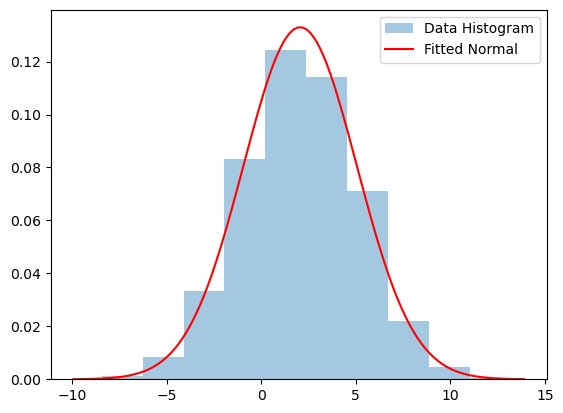

In [10]:
data_norm=data_generation('normal', [2,3], row_count)
print(normal_fit(data_norm))
normal_plot(data=data_norm, params=normal_fit(data_norm))

### Exponential

In [28]:
def exponential_fit(data):
        '''
        fits data to exponential distribution

        Args:
            data (pandas dataframe): data to be fitted to the specified distribution 

        Returns: 
            mu: 1/rate, parameter of exponential distribution 
        '''
        if isinstance(data, pd.DataFrame):
                pass
        else:
                data = pd.Series(data)
        mu = data.mean()

        return mu
    
def exponential_plot(data, params):
        x = np.arange(0, params*10,.01)
        y = (1/params)*np.exp(-x/params)
        plt.hist(data, alpha=.4, density = True, label="Data Histogram")
        plt.plot(x, y, color ='r', label="Fitted Exponential")
        plt.legend()
        plt.show()
        pass

5.02439338292347


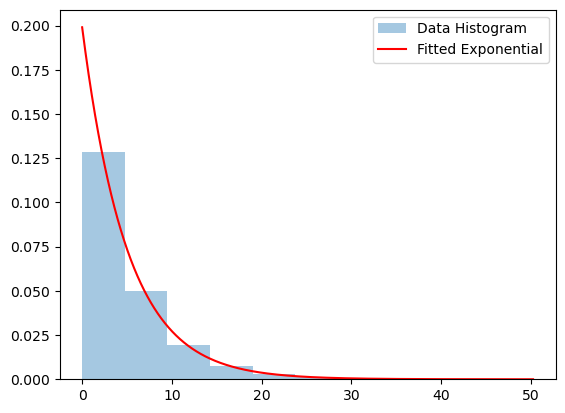

In [29]:
data_exp=data_generation('exponential', [5], row_count)
print(exponential_fit(data_exp))
exponential_plot(data=data_exp, params=exponential_fit(data_exp))

### Uniform (a,b)

In [51]:
def uniform_fit(data):
        '''
        fits data to uniform(a,b) distribution

        Args:
            data (pandas dataframe): data to be fitted to the specified distribution 

        Returns: 
            a: lower bound, parameter of uniform distribution 
            b: upper bound, parameter of uniform distribution 
        '''
        if isinstance(data, pd.DataFrame):
                pass
        else:
                data = pd.Series(data)
        a = data.min()
        b = data.max()
        return (a,b)
    
def uniform_plot(data, params):
        x = np.arange(params[0], params[1],.01)
        y = (1/(params[1]-params[0]))*np.ones(x.shape)
        plt.hist(data, alpha=.4, density = True, label="Data Histogram")
        plt.plot(x, y, color ='r', label="Fitted Uniform")
        plt.legend()
        plt.show()
        pass

(2.0000198712587873, 2.999890276359858)


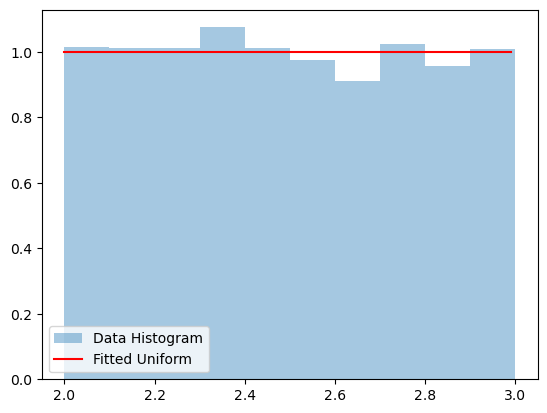

In [52]:
data_uni=data_generation('uniform', [2,3], row_count)
print(uniform_fit(data_uni))
uniform_plot(data=data_uni, params=uniform_fit(data_uni))

### Geometric(p)

In [59]:
def geometric_fit(data):
        '''
        fits data to geom(p) distribution

        Args:
            data (pandas dataframe): data to be fitted to the specified distribution 

        Returns: 
            p: parameter of geometric distribution  
        '''
        if isinstance(data, pd.DataFrame):
                pass
        else:
                data = pd.Series(data)
        p = 1/data.mean()
        return p
    
def geometric_plot(data, params):
        x = np.arange(1, data.max())
        y = (params)*(1-params)**x
        plt.bar(x, y, color ='r', label="Fitted Geometric")
        plt.hist(data, alpha=.4, density = True, label="Data Histogram")
        plt.legend()
        plt.show()
        pass

0.1989020606253481


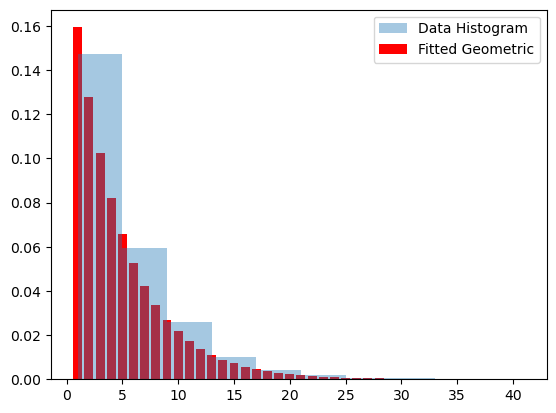

In [60]:
data_geom=data_generation('geometric', [1/5], row_count)
print(geometric_fit(data_geom))
geometric_plot(data=data_geom, params=geometric_fit(data_geom))